In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.io import wavfile
import IPython.display as ipd

# Read the audio file (replace 'your_audio_file.wav' with your file)
sample_rate, original_signal = wavfile.read('myaudio.wav')



In [2]:
ipd.Audio(original_signal, rate = sample_rate)

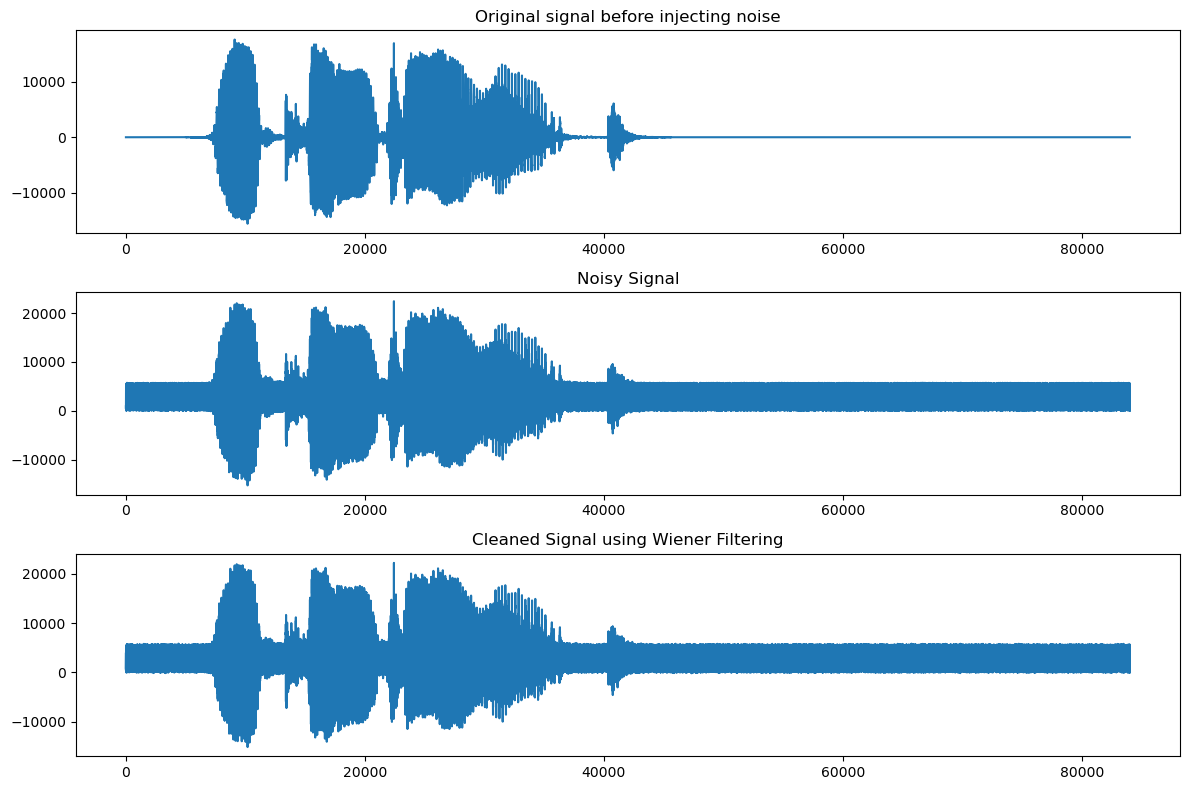

In [3]:
def add_noise(data):
    noise_amp = 0.35 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.uniform(size = data.shape[0])
    return data

noisy_signal = add_noise(original_signal)

# Convert to mono if stereo
if len(noisy_signal.shape) == 2:
    noisy_signal = noisy_signal.mean(axis=1)

# Perform FFT on the noisy signal
noisy_spectrum = fft(noisy_signal)
frequencies = np.fft.fftfreq(len(noisy_signal))

# Estimate noise power spectrum from the first 1000 samples
noise_profile = noisy_signal[:1000]  # Assume first 1000 samples are noise
noise_spectrum = fft(noise_profile)
noise_power = np.abs(noise_spectrum) ** 2

# Ensure the noise power spectrum matches the length of the signal power spectrum
noise_power = np.tile(noise_power, len(noisy_signal) // len(noise_power) + 1)[:len(noisy_signal)]

# Estimate the power spectrum of the noisy signal
signal_power = np.abs(noisy_spectrum) ** 2

# Estimate the clean signal power using Wiener filter formula
clean_power = signal_power - noise_power
clean_power = np.maximum(clean_power, 0)  # Ensure no negative values

# Wiener filter
H_wiener = clean_power / (clean_power + noise_power)
cleaned_spectrum = H_wiener * noisy_spectrum

# Reconstruct the cleaned signal using IFFT
cleaned_signal = ifft(cleaned_spectrum).real

# Plot original, noisy, and cleaned signals
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(original_signal)
plt.title('Original signal before injecting noise')
plt.subplot(3, 1, 2)
plt.plot(noisy_signal)
plt.title('Noisy Signal')
plt.subplot(3, 1, 3)
plt.plot(cleaned_signal)
plt.title('Cleaned Signal using Wiener Filtering')

plt.tight_layout()
plt.show()

# Save the cleaned signal to a new WAV file (optional)
wavfile.write('cleaned_audio_wiener.wav', sample_rate, cleaned_signal.astype(np.int16))

In [4]:
ipd.Audio(noisy_signal, rate = sample_rate)

In [76]:
ipd.Audio(cleaned_signal, rate = sample_rate)

D:\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


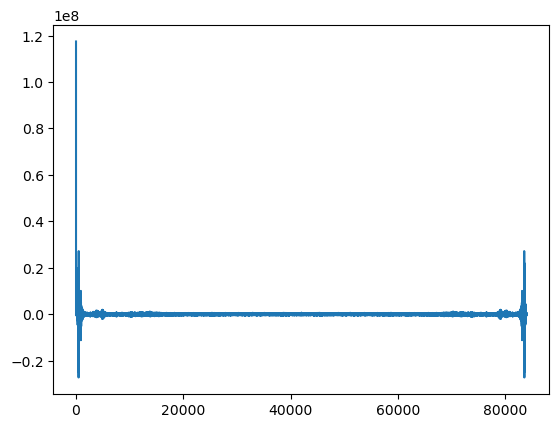

In [86]:
plt.plot(fft(noisy_signal))

### Also its much more better when we remove the higher magnitude from the fft. 

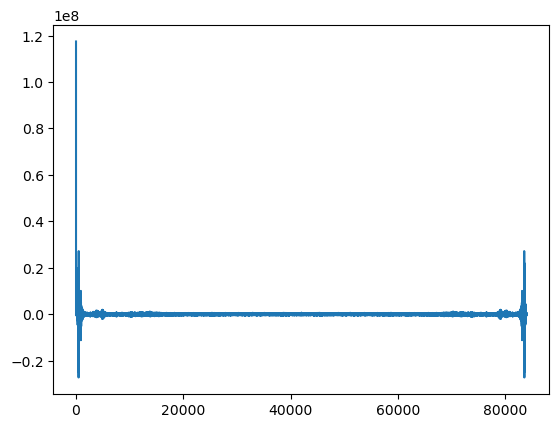

In [149]:
fft_noisy_signal = fft(noisy_signal)
plt.plot(fft_noisy_signal)

In [150]:
fft_cleaned = np.where(np.abs(fft_noisy_signal) > 1200000 , fft_noisy_signal , 0 )

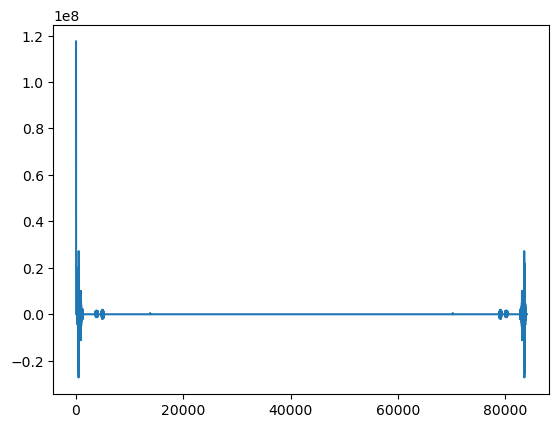

In [151]:
plt.plot(fft_cleaned)

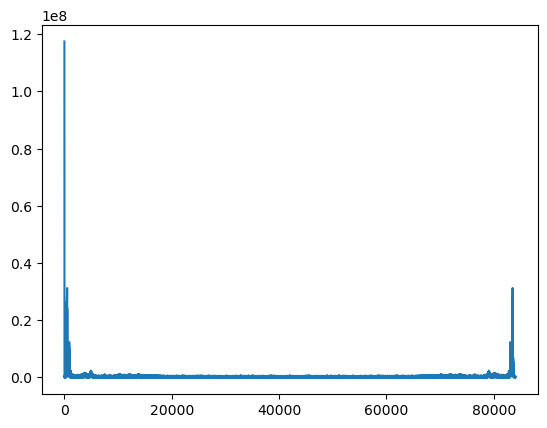

In [152]:
plt.plot(np.abs(fft_noisy_signal))

### Cleaned signal with threshold

In [153]:
ipd.Audio(np.real(scipy.fft.ifft(fft_cleaned)), rate = sample_rate)